#### Libraries

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#### Reading the data

In [18]:
df = pd.read_csv('mail_data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### EDA

In [19]:
#shape of the dataset
df.shape

(5572, 2)

In [4]:
#checking for NAn values
df.isna().sum()

Category    0
Message     0
dtype: int64

In [5]:
#understanding the datatypes
df.dtypes

Category    object
Message     object
dtype: object

#### Feature engineering : Transformation of categorical data of feature "Category"

In [20]:
df['Category'].replace({'spam':1,'ham':0},inplace = True) #converted spam to be 1 and not spam(ham) to be 0


In [21]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df.dtypes

Category     int64
Message     object
dtype: object

#### X and y declaration

In [23]:
X = df['Message']
y = df['Category']

In [24]:
print(X)
print(y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64


#### Counting the number of entries for both spam and ham

In [25]:
from collections import Counter
count  = Counter(y)
print(count)

Counter({0: 4825, 1: 747})


#### Splitting the data into train and test sets

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [27]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(4457,) (4457,)
(1115,) (1115,)


#### Feature extraction where text is converted into numerical data by countvectorizer

In [28]:
feature_extraction = TfidfVectorizer(min_df = 1,stop_words = 'english',lowercase = True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [15]:
#shape of the data


In [30]:
print(X_train_features.shape)
print(X_test_features.shape)

(4457, 7440)
(1115, 7440)


### Building Logistic Regression model

In [31]:
model = LogisticRegression()
model.fit(X_train_features, y_train)

LogisticRegression()

In [32]:
y_pred_training = model.predict(X_train_features)
print("The Training Accuracy : ",accuracy_score(y_train,y_pred_training))

The Training Accuracy :  0.9661207089970832


In [33]:
y_pred = model.predict(X_test_features)
print("THE TEST ACCURACY : ",accuracy_score(y_test,y_pred))

THE TEST ACCURACY :  0.967713004484305


#### Classification report

In [34]:
print("THE CLASSIFICATION REPORT : ")
print(classification_report(y_test, y_pred))

THE CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



#### Confusion matrix

Text(0.5, 1.0, '0 - ham 1 spam')

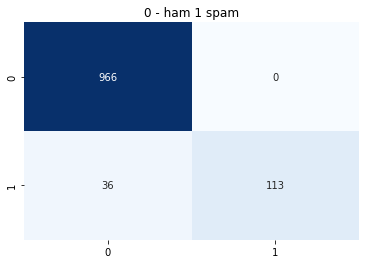

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

cn = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cn, annot=True, fmt="d", cmap="Blues", cbar=False,)
plt.title("0 - ham 1 spam")

#### prediction system

In [44]:
t ="Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
temp = [t]
temp_data_F = feature_extraction.transform(temp)
t = model.predict(temp_data_F)[0]
if(t == 0):
    print("Not A SPAM")
else:
    print("SPAM")

SPAM


In [45]:
!pip install joblib


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
import joblib
joblib.dump((model,feature_extraction),'spam_detection.pkl')

['spam_detection.pkl']